In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mental Health Dataset.csv to Mental Health Dataset.csv


In [ ]:
# TensorFlow is pre-installed in Google Colab, but run this if you're not sure
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
# Example: assuming target column is 'treatment' (Yes/No), and others are features
# Modify this part based on your dataset structure

# Encode categorical variables
df = df.dropna()  # drop missing for simplicity
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.drop('treatment', axis=1)
y = df['treatment']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6883 - loss: 0.5896 - val_accuracy: 0.7559 - val_loss: 0.5052
Epoch 2/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7583 - loss: 0.4936 - val_accuracy: 0.7746 - val_loss: 0.4598
Epoch 3/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7820 - loss: 0.4495 - val_accuracy: 0.7914 - val_loss: 0.4326
Epoch 4/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7958 - loss: 0.4252 - val_accuracy: 0.7983 - val_loss: 0.4171
Epoch 5/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8039 - loss: 0.4080 - val_accuracy: 0.8058 - val_loss: 0.4009
Epoch 6/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8080 - loss: 0.3976 - val_accuracy: 0.8024 - val_loss: 0.3967
Epoch 7/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8089 - loss: 0.3902 - val_accuracy: 0.8100 - val_loss: 0.3895
Epoch 8/10
12923/12923 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predict and show report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8159 - loss: 0.3733
Test Accuracy: 81.58%
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[23859  4636]
 [ 5945 22993]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     28495
           1       0.83      0.79      0.81     28938

    accuracy                           0.82     57433
   macro avg       0.82      0.82      0.82     57433
weighted avg       0.82      0.82      0.82     57433



1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


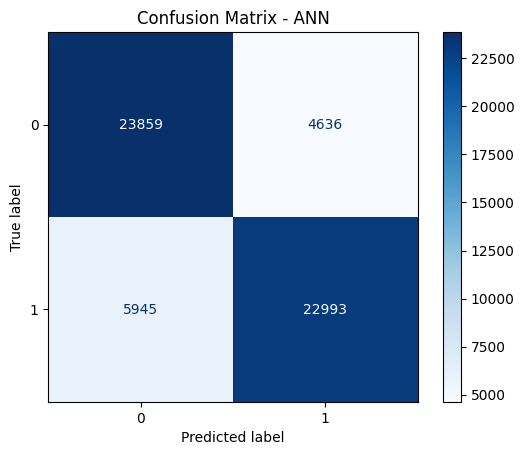

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions (for binary classification)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Converts probabilities to 0 or 1

# For multi-class classification, use:
# y_pred = np.argmax(model.predict(X_test), axis=1)
# y_test = np.argmax(y_test, axis=1)  # if y_test is one-hot encoded

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - ANN")
plt.show()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


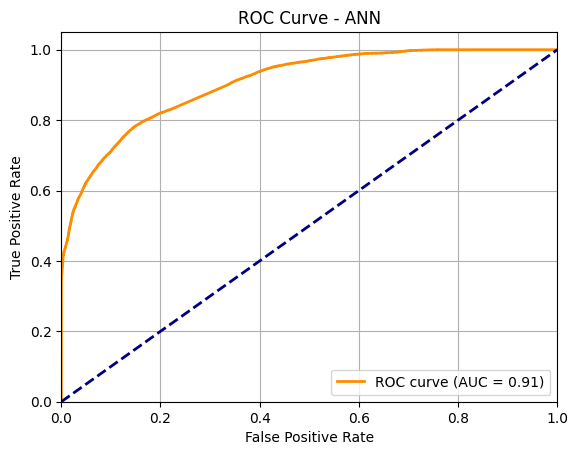

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend(loc="lower right")
plt.grid()
plt.show()
